In [26]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [27]:
#set parameters
Lx=0.01
Ly=0.01
nx=21
ny=21
dx=Lx/(nx-1)
dy=Ly/(ny-1)
alpha=1e-4
x=numpy.linspace(0.0,Lx,num=nx)
y=numpy.linspace(0.0,Ly,num=ny)
#initial conditions
T0=20.0*numpy.ones((ny,nx))
T0[0,:]=100.0
T0[:,0]=0.0

In [47]:
def ftcs(T0, nt, dt, dx, dy, alpha):
    T=T0.copy()
    sigma_x=alpha*dt/dx**2
    sigma_y=alpha*dt/dy**2
    I=int(nx/2)
    J=int(ny/2)
    for j in range(1,ny-1):
        for i in range(1,nx-1):
            T[j,i]=(T[j,i]+
                    sigma_x*(T[j,i-1]-2*T[j,i]+T[j,i+1])+
                    sigma_y*(T[j-1,i]-2*T[j,i]+T[j+1,i]))
            T[0,:]=100.0#Bottom
            T[:,0]=100.0#Left
            T[-1,:]=T[2,:]#Top
            T[:,-1]=T[:,-2]#Right
            if T[I,J]>=70.0:
                break
    print('Time step{};temperature at center is{} c'.format(n,T[J,I]))
    return T

In [48]:
sigma=0.5
dt=sigma/(alpha*(1/dx**2+1/dy**2))
nt=500

In [49]:
T=ftcs(T0,nt,dt,dx,dy,alpha)

NameError: name 'n' is not defined

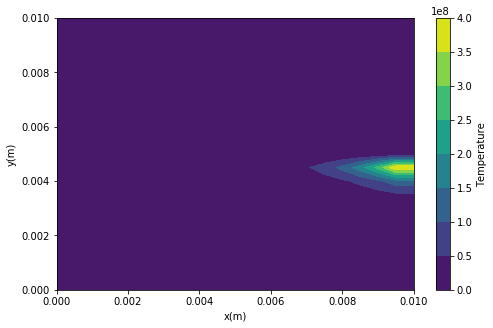

In [50]:
pyplot.figure(figsize=(8.0,5.0))
pyplot.xlabel('x(m)')
pyplot.ylabel('y(m)')
contf=pyplot.contourf(x,y,T)
cbar=pyplot.colorbar(contf)
cbar.set_label('Temperature')